**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4033 - Visión computacional para imágenes y video**

Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

**Semana 7**
Algoritmos de extracción de características

9. Image Matching

**EQUIPO 48**:

* José Alberto Rodríguez Sotomayor - A01796604
* André Maximiliano Hernández Bornn - A01795190
* César Armando Prieto Siller - A01796382
* Hector Magaña Torres - A00823440





# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

/tmp/ipython-input-1510717638.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

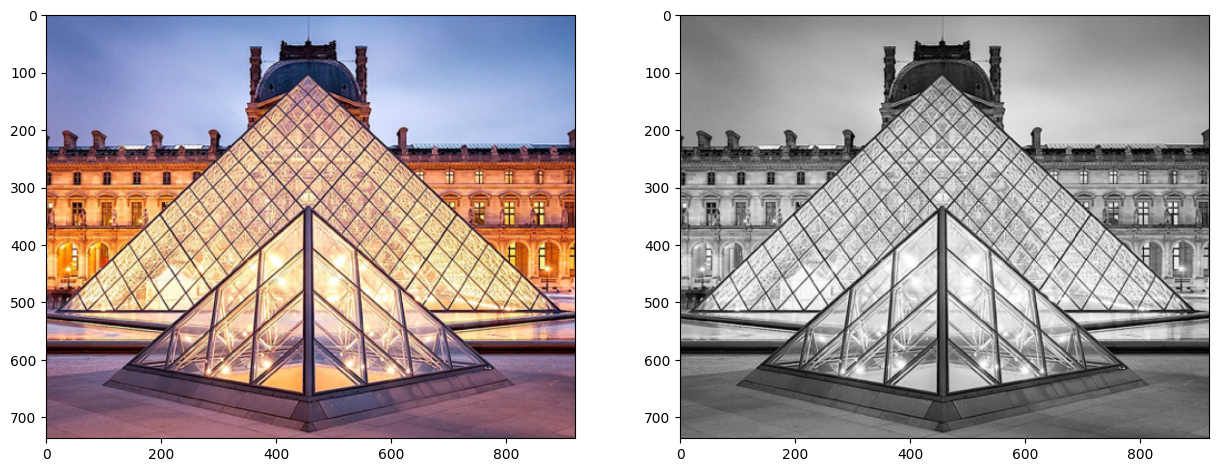

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Equipo 48/Actividad 7.2/LOUVREshorter.png')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [ ]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [ ]:
def gaussian_kernel(size, sigma=3):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 3))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 3))
Iyy = convolve(I_y**2, gaussian_kernel(3, 3))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [ ]:
k = 0.06

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy

harris_response = detA - k * traceA ** 2

In [ ]:
img_gray.shape

(737, 920)

In [ ]:
window_size = 9
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [ ]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

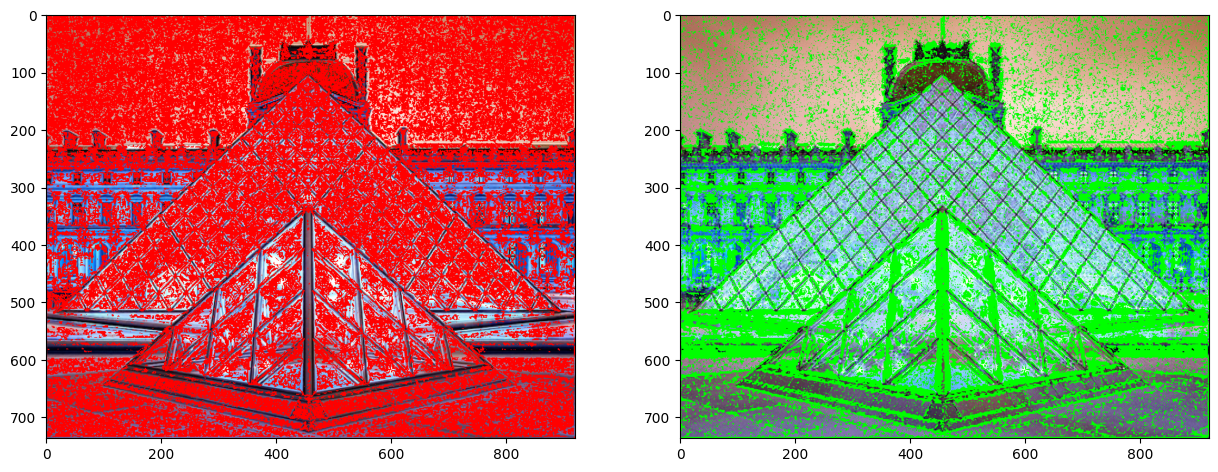

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

# **Conclusiones**

Esta actividad permitió comprender y aplicar las etapas que conforman la implementación del algoritmo de detección de esquinas y bordes de Harris.

Conversión a escala de grises: El primer paso consistió en transformar la imagen a escala de grises, un proceso fundamental en visión por computadora, ya que muchos algoritmos trabajan sobre los valores de intensidad y no sobre el color.

Cálculo de derivadas espaciales: Se obtuvieron los gradientes espaciales en las direcciones x y y mediante los operadores de Sobel. Estos gradientes permiten resaltar las variaciones de intensidad que indican la presencia de bordes.

Construcción del tensor de estructura: A partir de los gradientes y aplicando un filtro gaussiano, se generó el tensor de estructura, el cual resume la información de los gradientes en una vecindad local. Este paso es esencial para distinguir entre zonas planas, bordes y esquinas.

Cálculo de la respuesta de Harris: Se determinó la función de respuesta de Harris utilizando el determinante y la traza del tensor de estructura. La magnitud y el signo de esta respuesta permiten clasificar las distintas regiones de la imagen.

Detección de bordes y esquinas: Mediante un umbral aplicado a la respuesta de Harris, los pixeles se clasificaron como esquinas (respuesta positiva), bordes (respuesta negativa) o regiones planas (respuesta cercana a cero). Las visualizaciones finales mostraron claramente los puntos detectados superpuestos sobre la imagen original.

Se modificaron los parámetros de sigma, tamaño de ventana y 'k' para revisar el impacto en la mejora de la detección de esquinas y bordes. Los parámetros con mayor afectación fueron 'k' (0.05 a 1.5) y sigma (1 al 15), que al incrementarlos demasiado afectaban a la detección de esquinas de forma importante.

# Referencias

Javaheri, B. (2023, 16 de marzo). *Feature extraction and image classification using deep neural networks and OpenCV*. Domino Data Lab. [https://domino.ai/blog/feature-extraction-and-image-classification-using-deep-neural-networks](https://domino.ai/blog/feature-extraction-and-image-classification-using-deep-neural-networks)

Huamán, A. (n.d.). 2D Features framework (feature2d module). In OpenCV 3.4 Documentation. Recuperado de https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html